<a href="https://colab.research.google.com/github/shifatzaman/basic/blob/main/LinearRegressionWithShapXAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install shap
!pip install pandas
!pip install scikit-learn

In [22]:
from sklearn import datasets
from sklearn import linear_model
import numpy as np
import pandas as pd
import shap

In [24]:
data = datasets.load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.DataFrame(data.target, columns=["MEDV"])

print (data.DESCR)



X = df
X100 = shap.utils.sample(X, 100)
y = target["MEDV"]

lm = linear_model.LinearRegression()
model = lm.fit(X,y)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [12]:
predictions = lm.predict(X)

In [13]:
print(predictions[0:5])

[30.00384338 25.02556238 30.56759672 28.60703649 27.94352423]


In [16]:
print(target.describe)

<bound method NDFrame.describe of      MEDV
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
..    ...
501  22.4
502  20.6
503  23.9
504  22.0
505  11.9

[506 rows x 1 columns]>


In [17]:
lm.score(X,y)

0.7406426641094095

In [18]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(4))

Model coefficients:

CRIM = -0.108
ZN = 0.0464
INDUS = 0.0206
CHAS = 2.6867
NOX = -17.7666
RM = 3.8099
AGE = 0.0007
DIS = -1.4756
RAD = 0.306
TAX = -0.0123
PTRATIO = -0.9527
B = 0.0093
LSTAT = -0.5248


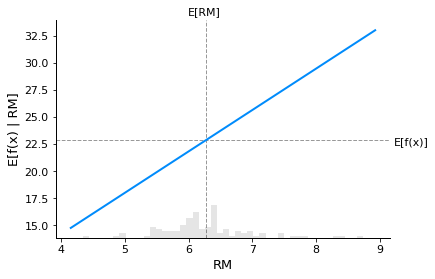

In [25]:
shap.plots.partial_dependence(
    "RM", model.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

Permutation explainer: 507it [00:13, 12.35it/s]                         


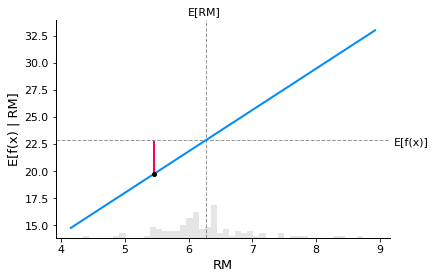

In [26]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X)

# make a standard partial dependence plot
sample_ind = 18
shap.partial_dependence_plot(
    "RM", model.predict, X100, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

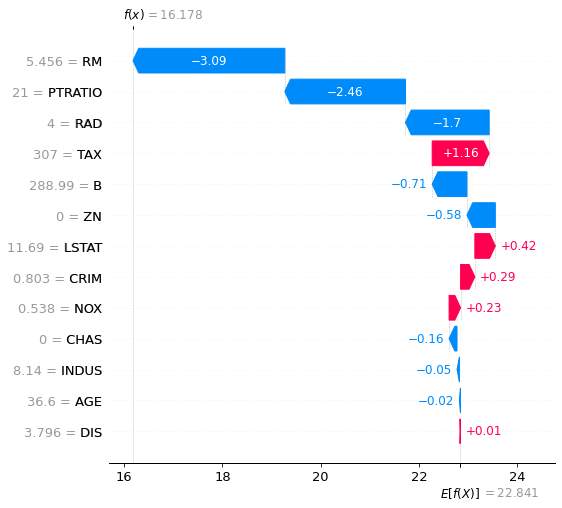

In [27]:
shap.plots.waterfall(shap_values[sample_ind], max_display=14)